In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv('/kaggle/input/nep-sent/train (1).csv')
test=pd.read_csv('/kaggle/input/nep-sent/test (2).csv')

In [4]:
print(train.head())
print(test.head())

                                                text label
0  बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...     2
1  1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...     1
2  होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...     2
3  खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...     2
4                                       राम्रो भयो️️     1
                                                text label
0  असाध्यै राम्रो कार्यक्रम आयोजना गरिएको छ हजुरह...     1
1  राम्रो कार्यक्रम, पहिलो सिजनले समेटेको कार्यक्...     1
2  महानायक राजेश हमाल तपाई साँच्चै धन्यवादको पात्...     1
3  जातको प्रष्न बाट सबै जनालाई सकरात्मक सन्देश मि...     1
4  बहसको सुरुवात भएको छ, अझै जोडदार रुपमा गर्नुपर...     1


In [5]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5999 non-null   object
 1   label   6000 non-null   object
dtypes: object(2)
memory usage: 93.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1995 non-null   object
 1   label   1996 non-null   object
dtypes: object(2)
memory usage: 31.3+ KB
None


***Null rows removal***

In [6]:
train.isnull().sum()

text     1
label    0
dtype: int64

In [7]:
test.isnull().sum()

text     1
label    0
dtype: int64

In [8]:
train=train.dropna()

In [9]:
train

,text,label
0,बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...,2
1,1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...,1
2,होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...,2
3,"खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...",2
4,राम्रो भयो️️,1
...,...,...
5995,समाज परिवर्तन गराउन लाई अरु को मुख हेर्ने भन्द...,1
5996,"Filmy क्षेत्रमा धेरै गर्नु भयो,,अब समाज र देश ...",2
5997,यस्तै यस्तै कार्यक्रम अझ बढी हुन जरुरी छ कुना ...,2
5998,बधाई र सुभकामना ।।,1


In [10]:
test.isnull().sum()

text     1
label    0
dtype: int64

In [11]:
test=test.dropna()

In [12]:
test

,text,label
0,असाध्यै राम्रो कार्यक्रम आयोजना गरिएको छ हजुरह...,1
1,"राम्रो कार्यक्रम, पहिलो सिजनले समेटेको कार्यक्...",1
2,महानायक राजेश हमाल तपाई साँच्चै धन्यवादको पात्...,1
3,जातको प्रष्न बाट सबै जनालाई सकरात्मक सन्देश मि...,1
4,"बहसको सुरुवात भएको छ, अझै जोडदार रुपमा गर्नुपर...",1
...,...,...
1991,कस्ता कस्ता पागल memory king छन यार नेपालमा,0
1992,दोस्रो मूर्ख बिजय साही हो,0
1993,बिजय शाहीलाई किन निरुत्साहित गरेको त पुण्य गौत...,0
1994,यस्ता बिदेशी महादलालीहरु कहाँ गएर यो प्रश्नको ...,0


***Labels Visualization***

In [13]:
train['label'].value_counts()

label
1     2378
0     2376
2     1236
-        5
20       1
11       1
o        1
--       1
Name: count, dtype: int64

In [14]:
test['label'].value_counts()

label
1    888
0    609
2    496
o      1
-      1
Name: count, dtype: int64

In [15]:
invalid_labels=['20','11','o','--','-']
train=train[~train['label'].isin(invalid_labels)]

In [16]:
train.head(10)

,text,label
0,बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...,2
1,1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...,1
2,होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...,2
3,"खैँ MBJC प्रति कित्तामा रू,10/-ले बढेर आज रू,1...",2
4,राम्रो भयो️️,1
5,"मध्यभोटेकोशिको शेयर ,, कर्मचारी संञ्चयकोष का स...",2
6,जानकारीको लागि धन्यवाद रामहरी ब्रदर,1
7,हाईड्रो र फाइनान्स बुम बुम भन्न छोडिएछ त ?,2
8,Profit booking ले यत्रो अङ्कको गिरावट त नआउनु ...,2
9,फेरि भर्चुअल मिटिङ कहिले हुन्छ दाजु हजुर जानका...,2


In [17]:
invalid_labels=['20','11','o','--','-']
test=test[~test['label'].isin(invalid_labels)]

In [18]:
test

,text,label
0,असाध्यै राम्रो कार्यक्रम आयोजना गरिएको छ हजुरह...,1
1,"राम्रो कार्यक्रम, पहिलो सिजनले समेटेको कार्यक्...",1
2,महानायक राजेश हमाल तपाई साँच्चै धन्यवादको पात्...,1
3,जातको प्रष्न बाट सबै जनालाई सकरात्मक सन्देश मि...,1
4,"बहसको सुरुवात भएको छ, अझै जोडदार रुपमा गर्नुपर...",1
...,...,...
1991,कस्ता कस्ता पागल memory king छन यार नेपालमा,0
1992,दोस्रो मूर्ख बिजय साही हो,0
1993,बिजय शाहीलाई किन निरुत्साहित गरेको त पुण्य गौत...,0
1994,यस्ता बिदेशी महादलालीहरु कहाँ गएर यो प्रश्नको ...,0


Text(0.5, 1.0, 'Classes Visualization')

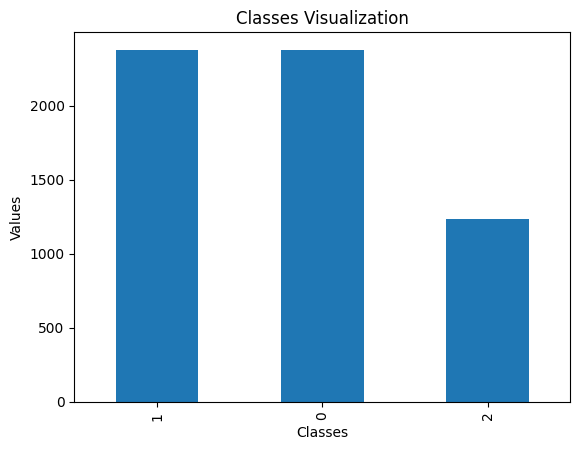

In [19]:
train['label'].value_counts().plot(kind="bar")
plt.xlabel("Classes")
plt.ylabel("Values")
plt.title("Classes Visualization")

***Class 2 has less data***

Text(0.5, 1.0, 'Classes Visualization')

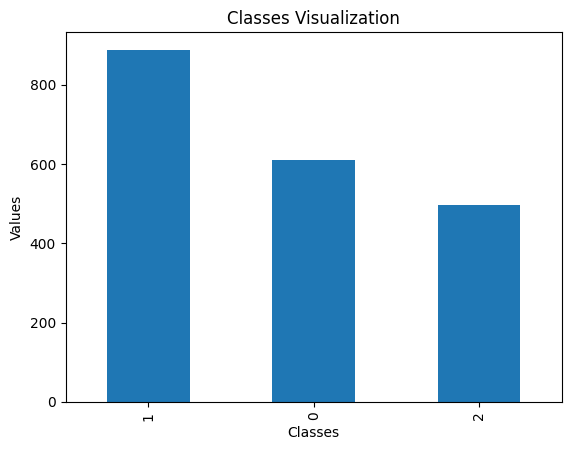

In [20]:
test['label'].value_counts().plot(kind="bar")
plt.xlabel("Classes")
plt.ylabel("Values")
plt.title("Classes Visualization")

***Emoji_conversion***

In [21]:
import emoji
train.loc[:,'text'] = train['text'].apply(lambda x: emoji.demojize(x))
test.loc[:,'text'] = test['text'].apply(lambda x: emoji.demojize(x))

***Special characters removal***

In [22]:
import re
train.loc[:,'text'] = train['text'].str.replace(r'[^\w\s\u0900-\u097F]','',regex=True)
test.loc[:,'text']=test['text'].str.replace(r'[^\w\s\u0900-\u097F]','',regex=True)
print(train)

                                                   text label
0     बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...     2
1     1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...     1
2     होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...     2
3     खैँ MBJC प्रति कित्तामा रू10ले बढेर आज रू1100 ...     2
4                                            राम्रो भयो     1
...                                                 ...   ...
5995  समाज परिवर्तन गराउन लाई अरु को मुख हेर्ने भन्द...     1
5996  Filmy क्षेत्रमा धेरै गर्नु भयोअब समाज र देश को...     2
5997  यस्तै यस्तै कार्यक्रम अझ बढी हुन जरुरी छ कुना ...     2
5998                                 बधाई र सुभकामना ।।     1
5999      कार्यक्रम एकदमै सकारात्मक छ। निरन्तरता पाओस्।     1

[5990 rows x 2 columns]


In [23]:
train.loc[:,'text']=train['text'].str.lower()
test.loc[:,'text']=test['text'].str.lower()

In [24]:
train

,text,label
0,बजार ले जसरी ट्रेन्ड चेन्ज गर्यो यो हेर्दा तत्...,2
1,1000 अंकले घटेको नेप्से 200 अंकले बढ्नु ठूलो क...,1
2,होइन यो सानिमा बैंक ले bonus घोसणा गरेको २ महि...,2
3,खैँ mbjc प्रति कित्तामा रू10ले बढेर आज रू1100 ...,2
4,राम्रो भयो,1
...,...,...
5995,समाज परिवर्तन गराउन लाई अरु को मुख हेर्ने भन्द...,1
5996,filmy क्षेत्रमा धेरै गर्नु भयोअब समाज र देश को...,2
5997,यस्तै यस्तै कार्यक्रम अझ बढी हुन जरुरी छ कुना ...,2
5998,बधाई र सुभकामना ।।,1


***Removing stopwords***

In [25]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [26]:
with open ('/kaggle/input/nep-stopword-senti/nepali_stopwords.txt','r',encoding='utf-8')  as file:
    nep_stopwords= file.read().splitlines()

In [27]:
total_stopwords = stopwords.words('english') + nep_stopwords

Function For Stopword removal

In [28]:
def remove_stopwords(text):
    words=text.split()
    final_words=[word for word in words if word not in total_stopwords]
    return' '.join(final_words)

In [29]:
train.loc[:,'text']=train['text'].apply(remove_stopwords)
test.loc[:,'text']=test['text'].apply(remove_stopwords)

In [30]:
X_train=train['text']
X_test=test['text']
y_train=train['label']
y_test=test['label']

*******Using google muril*******

In [31]:
!nvidia-smi

Wed Dec 11 05:53:17 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   54C    P8             13W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [34]:
import torch
from torch import nn
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import AdamW
from torch.nn import CrossEntropyLoss


import torch
from transformers import AutoTokenizer , AutoModelForSequenceClassification
from torch.utils.data import DataLoader

In [49]:
import torch
from torch import nn
from transformers import AutoModelForSequenceClassification

class MuRILWithDropout(nn.Module):
    def __init__(self, model_name="google/muril-base-cased", num_labels=3, dropout_rate=0.5):
        super(MuRILWithDropout, self).__init__()
        self.model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, input_ids, attention_mask):
        outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        logits = self.dropout(logits)
        return logits


In [43]:
tokenizer = AutoTokenizer.from_pretrained("google/muril-base-cased")

def tokenize_texts(texts, tokenizer, max_length=128):
    return tokenizer(
        list(texts),
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors="pt"
    )

train_texts = X_train.astype(str).tolist()
test_texts = X_test.astype(str).tolist()

train_encodings = tokenize_texts(train_texts, tokenizer)
test_encodings = tokenize_texts(test_texts, tokenizer)


In [44]:
from sklearn.preprocessing import LabelEncoder
import torch

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

train_labels_tensor = torch.tensor(y_train, dtype=torch.long)
test_labels_tensor = torch.tensor(y_test, dtype=torch.long)


In [45]:
train_dataset = TensorDataset(
    train_encodings['input_ids'], 
    train_encodings['attention_mask'], 
    train_labels_tensor
)

test_dataset = TensorDataset(
    test_encodings['input_ids'], 
    test_encodings['attention_mask'], 
    test_labels_tensor
)

batch_size = 16 
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [50]:
from torch.optim import AdamW
from sklearn.metrics import accuracy_score, precision_score, f1_score

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model_1 = MuRILWithDropout(num_labels=3)  
model_1.to(device)

optimizer = AdamW(model_1.parameters(), lr=2e-5, weight_decay=0.01)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google/muril-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [52]:
epochs = 5
for epoch in range(epochs):
    model_1.train()
    total_train_loss = 0
    train_true_labels = []
    train_predictions = []

    for batch in train_loader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]
        optimizer.zero_grad()

        outputs = model_1(input_ids, attention_mask=attention_mask)
        loss = torch.nn.CrossEntropyLoss()(outputs, labels)
        logits = outputs

        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        preds = torch.argmax(logits, dim=1)
        train_true_labels.extend(labels.cpu().numpy())
        train_predictions.extend(preds.cpu().numpy())

    train_accuracy = accuracy_score(train_true_labels, train_predictions)
    train_precision = precision_score(train_true_labels, train_predictions, average='weighted')
    train_f1 = f1_score(train_true_labels, train_predictions, average='weighted')

    print(f"Epoch {epoch + 1}:")
    print(f"Training Loss: {total_train_loss / len(train_loader):.4f}")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Training Precision: {train_precision:.4f}")
    print(f"Training F1 Score: {train_f1:.4f}")


Epoch 1:
Training Loss: 0.6846
Training Accuracy: 0.7073
Training Precision: 0.7240
Training F1 Score: 0.7021
Epoch 2:
Training Loss: 0.6421
Training Accuracy: 0.7157
Training Precision: 0.7372
Training F1 Score: 0.7101
Epoch 3:
Training Loss: 0.6074
Training Accuracy: 0.7254
Training Precision: 0.7499
Training F1 Score: 0.7195
Epoch 4:
Training Loss: 0.5904
Training Accuracy: 0.7352
Training Precision: 0.7587
Training F1 Score: 0.7300
Epoch 5:
Training Loss: 0.5736
Training Accuracy: 0.7341
Training Precision: 0.7597
Training F1 Score: 0.7286


In [48]:

torch.save(model_1.state_dict(), "muril_model.pth")

tokenizer.save_pretrained("muril_model")


('muril_model/tokenizer_config.json',
 'muril_model/special_tokens_map.json',
 'muril_model/vocab.txt',
 'muril_model/added_tokens.json',
 'muril_model/tokenizer.json')

In [57]:
    model_1.eval()
    
    total_test_loss = 0
    test_true_labels = []
    test_predictions = []
    
    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = [x.to(device) for x in batch]
    
            outputs = model_1(input_ids, attention_mask=attention_mask)
            logits = outputs
            loss = torch.nn.CrossEntropyLoss()(logits, labels)
    
            total_test_loss += loss.item()

            preds = torch.argmax(logits, dim=1)
    
            test_true_labels.extend(labels.cpu().numpy())
            test_predictions.extend(preds.cpu().numpy())
    
    test_accuracy = accuracy_score(test_true_labels, test_predictions)
    test_precision = precision_score(test_true_labels, test_predictions, average='weighted')
    test_f1 = f1_score(test_true_labels, test_predictions, average='weighted')
    
    print("Test Results:")
    print(f"Test Loss: {total_test_loss / len(test_loader):.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test Precision: {test_precision:.4f}")
    print(f"Test F1 Score: {test_f1:.4f}")


Test Results:
Test Loss: 0.8903
Test Accuracy: 0.6688
Test Precision: 0.6637
Test F1 Score: 0.6517
